# **Lab2 - Webscraping**

## Introduction

At the end of this laboratory, you should be able to:

*   scrape text from internet websites
*   scrate data from tables

Reminder: you need to show your results / submit this jupyter file to have your lab credited.

Now, let us begin!

First, let us import the standard packages that we need. We might need to install some packages in python in our local drive as needed. However, this file was checked to work in Google Colab as of 2023-08-25.

In [23]:
# Let us import that standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## Scraping texts (Option 1)

Let us take a website and see if we can scrape the texts from that website. For this example, let us use a static Wikipedia website (a fixed version) that gives a list of presidents of Vietnam.

Here is the link: https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497.

For this part (and with the intention of making a simple wordcloud as a visual), let us use the package wordcloud and urllib.

In [24]:
##install wordcloud
#pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import urllib

url = 'https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497'

Now, let us get the text that can be read from the url, as well as the *stopwords* (the words we will ignore).

In [25]:
text_cloud = urllib.request.urlopen(url).read().decode("utf-8")
stopwords = set(STOPWORDS)

print(text_cloud)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of presidents of Vietnam - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientp

From this, we can generate a wordcloud:

{"that's", 'which', "can't", 'as', "didn't", 'here', 'she', "doesn't", 'yourself', "don't", "they'll", 'few', "they've", 'himself', 'herself', 'am', 'while', 'up', "it's", 'having', 'that', 'very', 'an', "he'll", 'is', 'than', 'our', 'other', "we'd", 'whom', 'after', "he's", 'against', 'not', "weren't", 'above', 'most', 'or', 'why', 'have', 'on', "who's", "how's", 'with', 'so', 'has', 'would', "you've", 'no', 'my', 'shall', 'some', 'because', 'i', 'at', 'how', 'more', 'else', 'for', 'there', 'www', 'http', 'therefore', 'your', 'me', 'ours', 'him', "i'm", 'to', "wasn't", 'were', 'by', 'k', 'once', 'where', 'otherwise', 'he', 'same', 'we', "you're", 'both', 'until', "haven't", 'myself', "hasn't", "couldn't", "i've", 'ourselves', 'below', 'should', "wouldn't", 'and', 'if', 'only', 'was', 'theirs', 'again', 'can', "shan't", 'been', 'what', 'each', "why's", "we've", 'out', "let's", 'ever', 'however', 'ought', 'these', 'like', 'through', 'are', 'this', "there's", 'being', 'any', "i'll", 'did

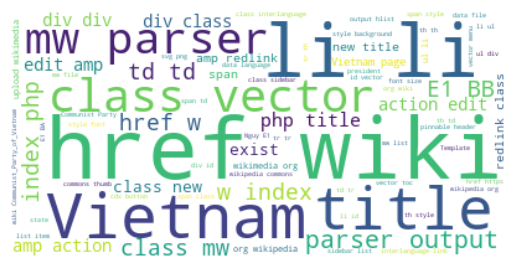

In [26]:
print(stopwords)
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
text_wc.generate(text_cloud)
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Congratulations! But this result looks weird, because a lot of stopwords are still present (these are html tags and options). What can we do about this? There are several options, and let's try the one below using the package BeautifulSoup.

## Scraping texts (Option 2)

Here, we will first extract the text from the website using the Python package beautifulsoup4. We will also need other support packages.

In [27]:
#!pip install beautifulsoup4
#!pip install requests

import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata

Now, let us try to get information from the website:

In [28]:
url= 'https://en.wikipedia.org/w/index.php?title=List_of_presidents_of_Vietnam&oldid=1167298497'
response_wiki = requests.get(url)
response_wiki.status_code

200

**Note**: The following code is optional, in case you ened to read a local version of the files.

In [29]:
from bs4 import BeautifulSoup

url1 = '/kaggle/input/htmlhsb/ASEAN Football Federation - Wikipedia.html'
url2 = '/kaggle/input/htmlhsb/List of presidents of Vietnam - Wikipedia.html'
url=url1
HTMLFileToBeOpened = open(url, "r", encoding='utf-8')#errors="ignore")
contents = HTMLFileToBeOpened.read()
beautifulSoupText = BeautifulSoup(contents,'html.parser')
soup=beautifulSoupText

p_all=beautifulSoupText.find_all('p')
para_all=p_all
print(p_all)

[<p class="mw-empty-elt">
</p>, <p>The <b>ASEAN Football Federation</b> (<b>AFF</b>) is an <a class="mw-redirect" href="/wiki/Organisation" title="Organisation">organisation</a> within the <a href="/wiki/Asian_Football_Confederation" title="Asian Football Confederation">Asian Football Confederation</a> (AFC) and is an international governing body of <a href="/wiki/Association_football" title="Association football">association football</a>, <a href="/wiki/Futsal" title="Futsal">futsal</a>, and <a href="/wiki/Beach_soccer" title="Beach soccer">beach soccer</a> in <a href="/wiki/Southeast_Asia" title="Southeast Asia">Southeast Asia</a>. It consists of the federations of <a href="/wiki/Football_Australia" title="Football Australia">Australia</a>, <a href="/wiki/Football_Association_of_Brunei_Darussalam" title="Football Association of Brunei Darussalam">Brunei</a>, <a href="/wiki/Football_Federation_of_Cambodia" title="Football Federation of Cambodia">Cambodia</a>, <a href="/wiki/East_Timor

The status code is 200, which means it is successful in getting data. If it is 400+ or 500+, then some error has occured. You can see the contents of the response, for example, by typing:

In [30]:
response_wiki.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of presidents of Vietnam - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-c

Not so nice, right? Let us make it prettier by using prettify:

In [31]:
soup = BeautifulSoup(response_wiki.text)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of presidents of Vietnam - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-li

This puts some indentation into the text, and gives us an easier time to understand the html structure of the website. Notice that the text we want to get (the main paragraph) is inside a paragraph tag: \<p> and <\p>.

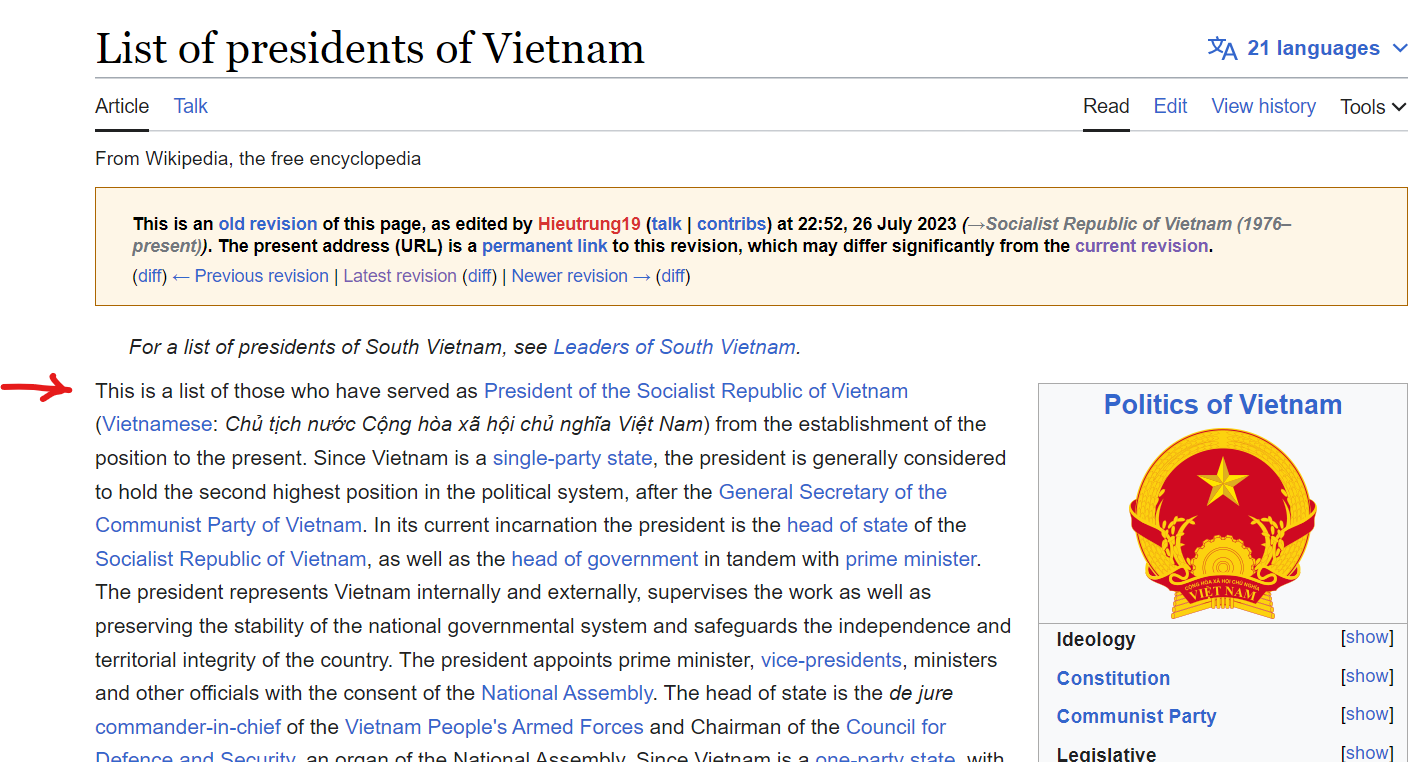

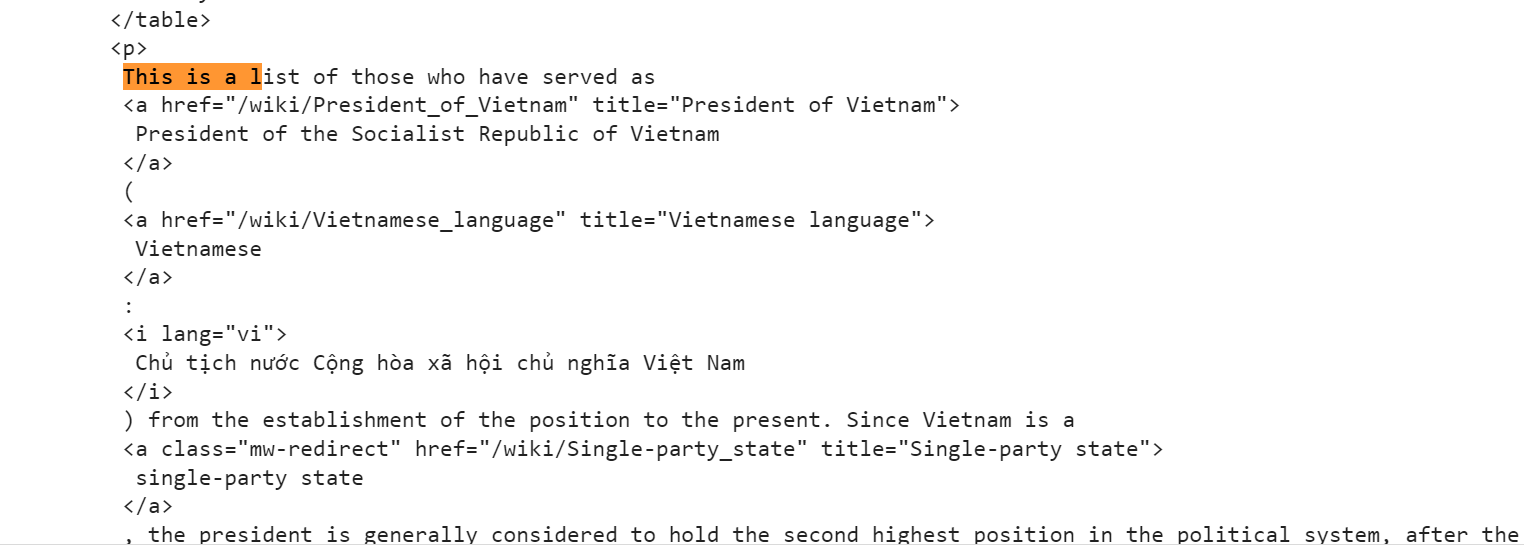

We will use BeautifulSoup to extract the contents of this text in the <p> tag using the find or find_all function.

In [32]:
para_all=soup.find_all('p')
para_all[3]

<p>This is a list of those who have served as <a href="/wiki/President_of_Vietnam" title="President of Vietnam">President of the Socialist Republic of Vietnam</a> (<a href="/wiki/Vietnamese_language" title="Vietnamese language">Vietnamese</a>: <i lang="vi">Chủ tịch nước Cộng hòa xã hội chủ nghĩa Việt Nam</i>) from the establishment of the position to the present. Since Vietnam is a <a class="mw-redirect" href="/wiki/Single-party_state" title="Single-party state">single-party state</a>, the president is generally considered to hold the second highest position in the political system, after the <a href="/wiki/General_Secretary_of_the_Communist_Party_of_Vietnam" title="General Secretary of the Communist Party of Vietnam">General Secretary of the Communist Party of Vietnam</a>. In its current incarnation the president is the <a href="/wiki/Head_of_state" title="Head of state">head of state</a> of the <a href="/wiki/Vietnam" title="Vietnam">Socialist Republic of Vietnam</a>, as well as the 

Notice that the paragraph we want is in the third \<p> tag., Hence, we need para_all[3] (para_all[2] in local file). Moreover, the result has a data type that is not a string (We can check using type(para_all[3])) and so, we need to convert it to a string and ignore all the html tags using the get_text function.

In [33]:
# convert to a string
paragraph=para_all[3].get_text()
print(paragraph)

This is a list of those who have served as President of the Socialist Republic of Vietnam (Vietnamese: Chủ tịch nước Cộng hòa xã hội chủ nghĩa Việt Nam) from the establishment of the position to the present. Since Vietnam is a single-party state, the president is generally considered to hold the second highest position in the political system, after the General Secretary of the Communist Party of Vietnam. In its current incarnation the president is the head of state of the Socialist Republic of Vietnam, as well as the head of government in tandem with prime minister. The president represents Vietnam internally and externally, supervises the work as well as preserving the stability of the national governmental system and safeguards the independence and territorial integrity of the country. The president appoints prime minister, vice-presidents, ministers and other officials with the consent of the National Assembly. The head of state is the de jure commander-in-chief of the Vietnam Peop

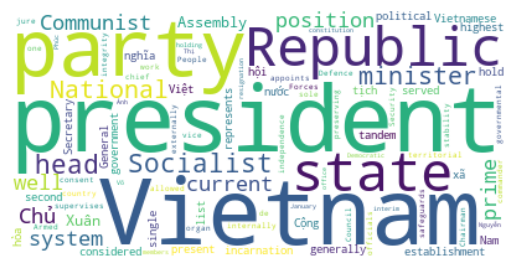

In [34]:
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

text_wc.generate(paragraph)
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

This looks a lot better. Now, if we want a statistical count of the words, we can try using the nltk package (natural language toolkit), and even output a bar plot of the frequency of each word.

<FreqDist with 130 samples and 236 outcomes>
[('the', 32), ('of', 21), ('is', 7), ('and', 7), ('Vietnam', 6), ('as', 5), ('Republic', 4), ('president', 4), ('The', 4), ('a', 3), ('Socialist', 3), ('head', 3), ('with', 3), ('have', 2), ('President', 2), ('position', 2), ('to', 2), ('Since', 2), ('state,', 2), ('in', 2), ('Communist', 2), ('Party', 2), ('current', 2), ('state', 2), ('well', 2), ('prime', 2), ('National', 2), ('Assembly.', 2), ('party', 2), ('Xuân', 2), ('This', 1), ('list', 1), ('those', 1), ('who', 1), ('served', 1), ('(Vietnamese:', 1), ('Chủ', 1), ('tịch', 1), ('nước', 1), ('Cộng', 1), ('hòa', 1), ('xã', 1), ('hội', 1), ('chủ', 1), ('nghĩa', 1), ('Việt', 1), ('Nam)', 1), ('from', 1), ('establishment', 1), ('present.', 1), ('single-party', 1), ('generally', 1), ('considered', 1), ('hold', 1), ('second', 1), ('highest', 1), ('political', 1), ('system,', 1), ('after', 1), ('General', 1), ('Secretary', 1), ('Vietnam.', 1), ('In', 1), ('its', 1), ('incarnation', 1), ('Viet

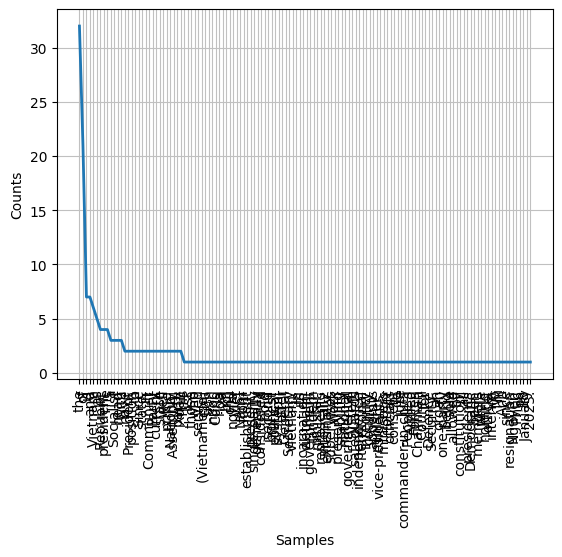

In [35]:
from nltk import FreqDist
words = paragraph.split()
fdist = FreqDist(words)
print(fdist)
print(fdist.most_common())
fdist.plot()

## Scraping tables

Probably, however, the information that we need is often stored in tables, such as the table present in the Wikipedia site that we have. Let us try to get the information from this table:

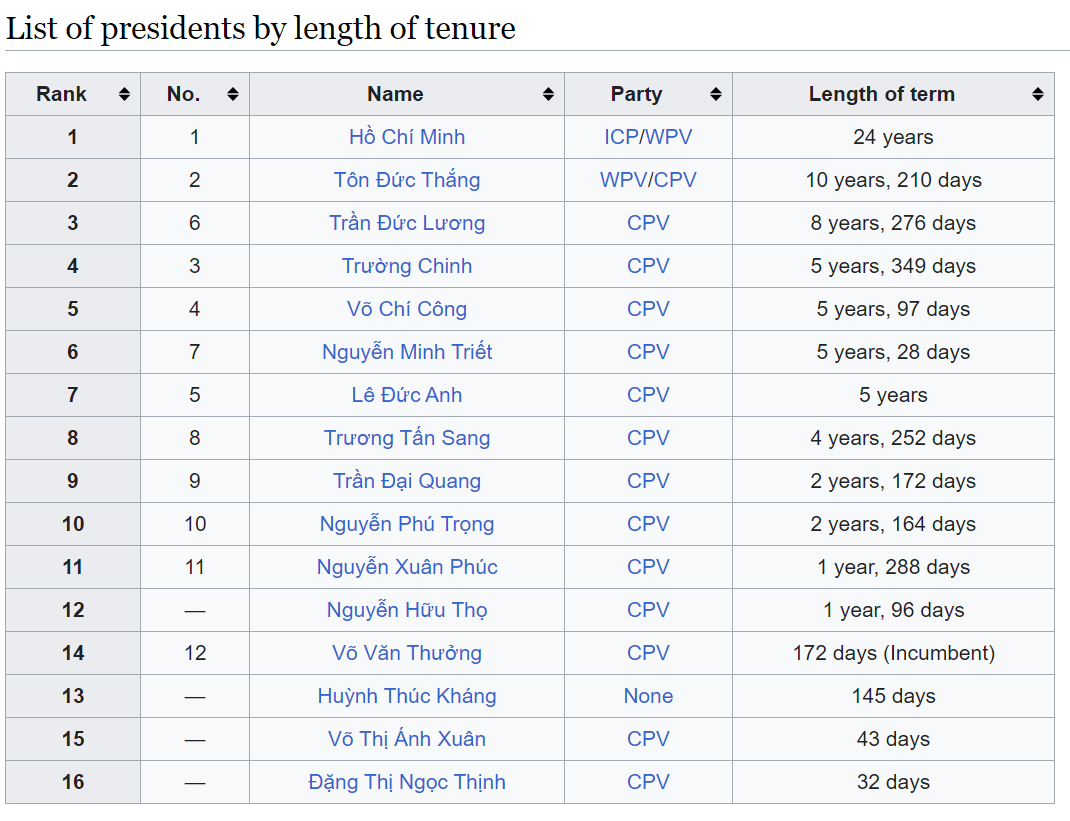

Running (right click on the table and "Inspect") shows that this is inside a \<table> tag.
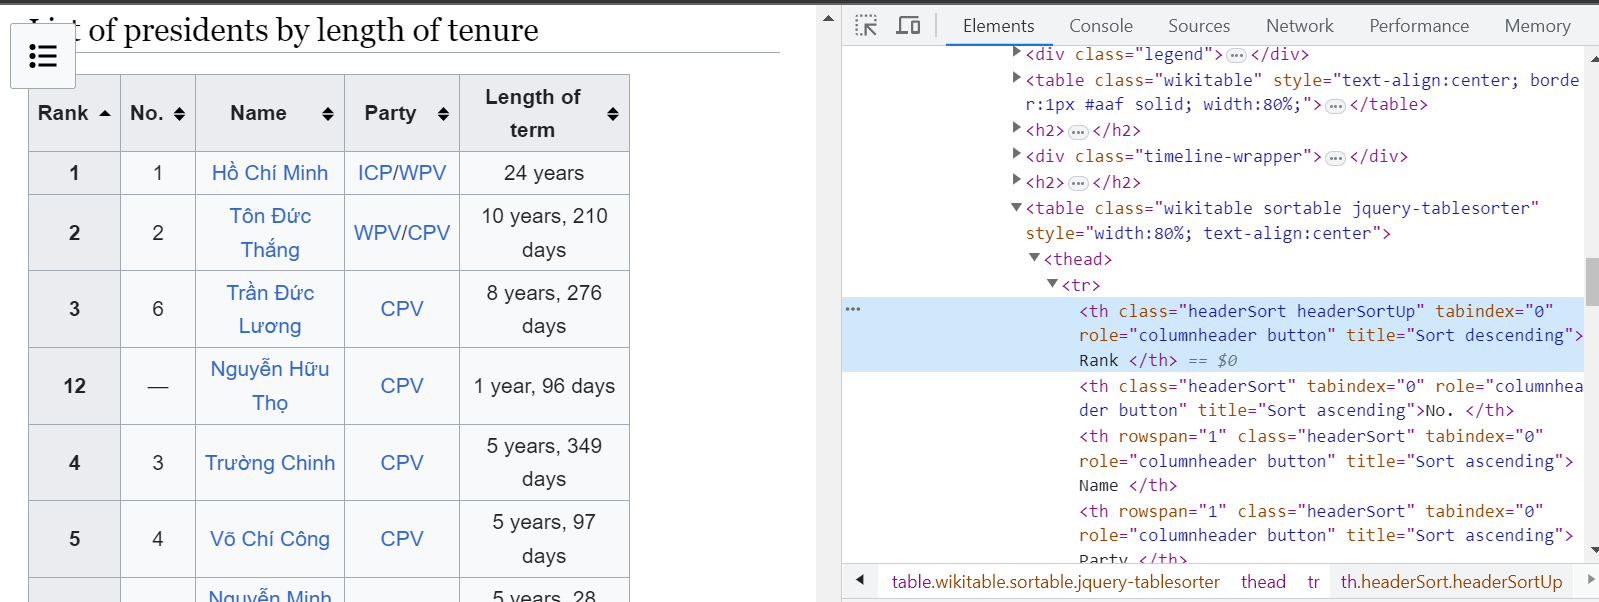

In [36]:
table_all=soup.find_all('table')

We need the 5th table (you can try looking for it manually).

In [37]:
table_all[4]

<table class="wikitable sortable" style="width:80%; text-align:center">
<tbody><tr>
<th>Rank
</th>
<th>No.
</th>
<th rowspan="1">Name
</th>
<th rowspan="1">Party
</th>
<th colspan="1">Length of term
</th></tr>
<tr>
<th data-sort-value="1">1
</th>
<td>1
</td>
<td><a href="/wiki/Ho_Chi_Minh" title="Ho Chi Minh">Hồ Chí Minh</a>
</td>
<td><a href="/wiki/Indochinese_Communist_Party" title="Indochinese Communist Party">ICP</a>/<a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">WPV</a>
</td>
<td>24 years
</td></tr>
<tr>
<th data-sort-value="2">2
</th>
<td>2
</td>
<td><a href="/wiki/T%C3%B4n_%C4%90%E1%BB%A9c_Th%E1%BA%AFng" title="Tôn Đức Thắng">Tôn Đức Thắng</a>
</td>
<td><a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">WPV</a>/<a href="/wiki/Communist_Party_of_Vietnam" title="Communist Party of Vietnam">CPV</a>
</td>
<td>10 years, 210 days
</td></tr>
<tr>
<th data-sort-value="3">3
</th>
<td>6
</td>
<td><a href="/wiki/Tr%E1%BA%A7n_%C4%90%

Here is the difficult part. The table headers (column names) are in \<th> tags, while the contents are in \<td> and \<tr> tags. For this, we provide functions and predefined code that will scrape these information (Taken from reference 2). Let us first extract the column names or headers. (The following function is taken from IBM Data Science Course.)

In [38]:
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [39]:
column_names = []

for row in table_all[4].find_all("th"): ##..............You need to input the table name here
    name=extract_column_from_header(row)
    if name is not None and len(name) > 0:
        column_names.append(name)

column_names

['Rank', 'No.', 'Name', 'Party', 'Length of term']

Now, we turn to the rows and individual cells. We create a dictionary for each column header and initialize each column.

In [40]:
pres_dict= dict.fromkeys(column_names)
pres_dict['Rank'] = []
pres_dict['Name'] = []
pres_dict['Party'] = []
pres_dict['Length of term'] = []

We now extract the table contents by looping. Each row is in a \<tr> tag, and each cell is in a \<td> tag. Thus, we need to loop over through all rows and find all the \<td>s.

In this example, the first \<td> is empty so we had to make an exception.

In [41]:
extracted_row = 0
for rows in table_all[4].find_all("tr"):
    row=rows.find_all('td')
    # first one is empty. This is a special case!
    if row==[]:
      continue

    pres_dict['Rank'].append(row[0].text.strip()) # needed to strip the extra linespace
    # No. is removed here because it is in a <th> tag and requires more complicated coding.
    pres_dict['Name'].append(row[1].text.strip())
    pres_dict['Party'].append(row[2].text.strip())
    pres_dict['Length of term'].append(row[3].text.strip())
pres_dict

{'Rank': ['1',
  '2',
  '6',
  '3',
  '4',
  '7',
  '5',
  '8',
  '9',
  '10',
  '11',
  '—',
  '12',
  '—',
  '—',
  '—'],
 'No.': None,
 'Name': ['Hồ Chí Minh',
  'Tôn Đức Thắng',
  'Trần Đức Lương',
  'Trường Chinh',
  'Võ Chí Công',
  'Nguyễn Minh Triết',
  'Lê Đức Anh',
  'Trương Tấn Sang',
  'Trần Đại Quang',
  'Nguyễn Phú Trọng',
  'Nguyễn Xuân Phúc',
  'Nguyễn Hữu Thọ',
  'Võ Văn Thưởng',
  'Huỳnh Thúc Kháng',
  'Võ Thị Ánh Xuân',
  'Đặng Thị Ngọc Thịnh'],
 'Party': ['ICP/WPV',
  'WPV/CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'CPV',
  'None',
  'CPV',
  'CPV'],
 'Length of term': ['24 years',
  '10 years, 210 days',
  '8 years, 276 days',
  '5 years, 349 days',
  '5 years, 97 days',
  '5 years, 28 days',
  '5 years',
  '4 years, 252 days',
  '2 years, 172 days',
  '2\xa0years, 164\xa0days',
  '1\xa0year, 288\xa0days',
  '1 year, 96 days',
  '1\xa0year, 245\xa0days (Incumbent)',
  '145 days',
  '43 days',
  '32 days']}

Then, finally, we convert to a dataframe.

In [42]:
df_pres=pd.DataFrame(pres_dict)
df_pres

,Rank,No.,Name,Party,Length of term
0,1,None,Hồ Chí Minh,ICP/WPV,24 years
1,2,None,Tôn Đức Thắng,WPV/CPV,"10 years, 210 days"
2,6,None,Trần Đức Lương,CPV,"8 years, 276 days"
3,3,None,Trường Chinh,CPV,"5 years, 349 days"
4,4,None,Võ Chí Công,CPV,"5 years, 97 days"
5,7,None,Nguyễn Minh Triết,CPV,"5 years, 28 days"
6,5,None,Lê Đức Anh,CPV,5 years
7,8,None,Trương Tấn Sang,CPV,"4 years, 252 days"
8,9,None,Trần Đại Quang,CPV,"2 years, 172 days"
9,10,None,Nguyễn Phú Trọng,CPV,"2 years, 164 days"


## Your turn!
Do the same exercise using a different wikipedia website. This is a website about the ASEAN football federation.

Link: https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823

Exercise 1: Make 1 wordcloud for ALL the paragraphs you can scrape.

Exercise 2: Scrape the 3rd table in the page and convert it into a dataframe. Hint: It has 5 columns.

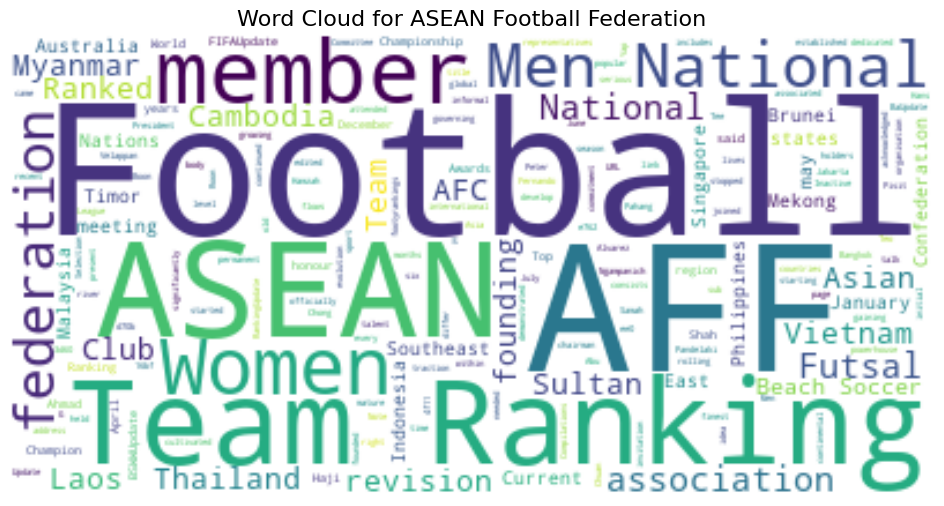

In [47]:
# Exercise 1:
# type your code here. Add code cells as needed
#Get the data using Beautiful Soup

url = 'https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

paragraphs = soup.find_all('p')
text = ' '.join([para.get_text() for para in paragraphs])

custom_stopwords = {'the', 'and', 'of', 'to', 'in'}
stopwords = set(STOPWORDS).union(custom_stopwords)

text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for ASEAN Football Federation', fontsize=16)
plt.show()


In [48]:
# Exercise 2:
# type your code here. Add code cells as needed

url = 'https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823'

response_wiki = requests.get(url)

soup = BeautifulSoup(response_wiki.content, 'html.parser')

table_all = soup.find_all('table')

third_table = table_all[2]


In [49]:
column_names=['Code','Association', 'Joined in', 'National team', 'National league']
#Note: using the function above will result to "Code" not being detected because of more complicated coding.

# prepare the dictionary to store your data
data = []

In [50]:
for row in third_table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')  # Find all td elements in the row

    if cells == []:
        continue
    
    data.append({
        'Code': cells[0].text.strip(),
        'Association': cells[1].text.strip(),
        'Joined in': cells[2].text.strip(),
        'National team': cells[3].text.strip(),
        'National league': cells[4].text.strip()
    })

                              #now, convert into a pandas dataframe
df_mem = pd.DataFrame(data, columns=column_names)
df_mem

,Code,Association,Joined in,National team,National league
0,AUS,Australia,2013,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
1,BRU,Brunei Darussalam*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,(Men)
2,CAM,Cambodia,1996,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
3,IDN,Indonesia*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
4,LAO,Laos,1996,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
5,MAS,Malaysia*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
6,MYA,Myanmar,1996,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
7,PHI,Philippines*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
8,SGP,Singapore*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"
9,THA,Thailand*,1984,Men'sU23U20U17U15FBSWomen'sW U23W U20W U17,"(Men, Women)"


<details>
url = 'https://en.wikipedia.org/w/index.php?title=ASEAN_Football_Federation&oldid=1165498823'
response_wiki = requests.get(url)
soup = BeautifulSoup(response_wiki.text)
table_all=soup.find_all('table')

table_all[2]

column_names=['Code','Association', 'Joined in', 'National team', 'National league']
#Note: using the function above will result to "Code" not being detected because of more complicated coding.
mem_dict= dict.fromkeys(column_names)
mem_dict['Code'] = []
mem_dict['Association'] = []
mem_dict['Joined in'] = []
mem_dict['National team'] = []
mem_dict['National league'] = []

extracted_row = 0
for rows in table_all[2].find_all("tr"):
    row=rows.find_all('td')
    #print(row)
    #print("------\n")
    # first one is empty
    if row==[]:
      continue
    mem_dict['Code'].append(row[0].text.strip())
    mem_dict['Association'].append(row[1].text.strip()) # needed to strip the extra linespace
    mem_dict['Joined in'].append(row[2].text.strip())
    mem_dict['National team'].append(row[3].text.strip())
    mem_dict['National league'].append(row[4].text.strip())

df_mem=pd.DataFrame(mem_dict)
df_mem
</details>

## Acknowledgement, Ownership, and References

This notebook is prepared by Emmanuel Plan (emmanuelplan@hsb.edu.vn) for HSB3119: Introduction to Data Science.


## References
1.   Jupyter Notebook of HSB1003 Data Analysis for MAS2, Emmanuel Plan, 2022-2023 Semester 1.
2.   Personal notes from IBM Data Science Course, Emmanuel Plan


### Changelog

1.   2023-08-24: Drafted initial version
2.   2024-09-15: Added local path
